In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
!pip install fbprophet
import fbprophet

In [ ]:
from google.colab import files

data = pd.read_csv("/content/drive/MyDrive/Data/Google Stock Price/GOOG.csv")
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-10-18,2824.270020,2859.975098,2824.270020,2859.209961,2859.209961,828200
248,2021-10-19,2865.830078,2882.139893,2861.919922,2876.439941,2876.439941,765800
249,2021-10-20,2884.449951,2884.955078,2838.239990,2848.300049,2848.300049,897000
250,2021-10-21,2843.840088,2856.989990,2832.739990,2855.610107,2855.610107,742500
251,2021-10-22,2807.020020,2831.169922,2743.409912,2772.500000,2772.500000,1507600


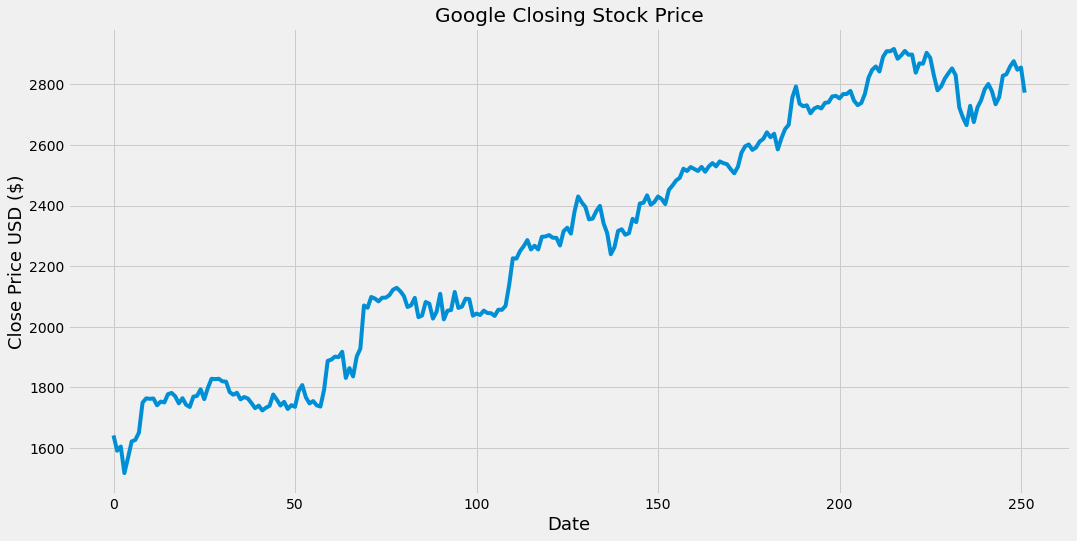

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [ ]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2020-10-23,1641.000000
1,2020-10-26,1590.449951
2,2020-10-27,1604.260010
3,2020-10-28,1516.619995
4,2020-10-29,1567.239990


In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


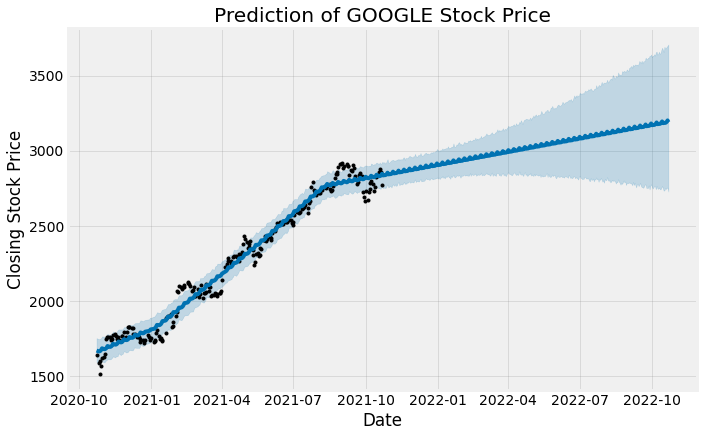

In [ ]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

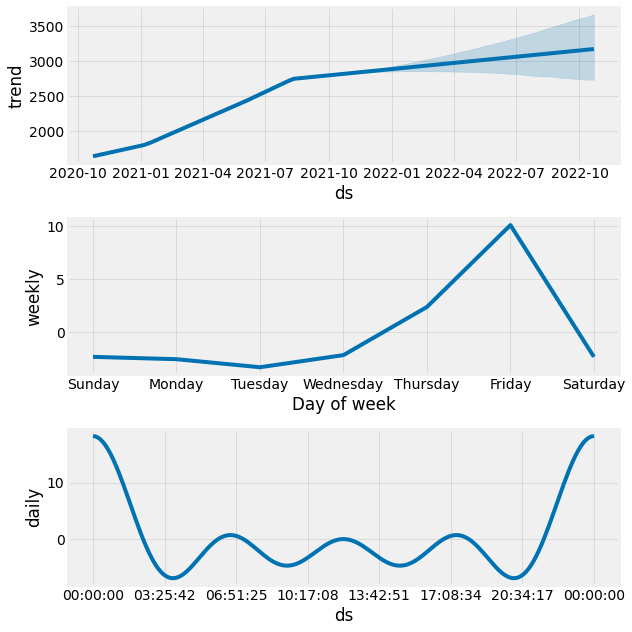

In [ ]:
m.plot_components(predictions)
plt.show()